Consider a TF Ising 1D spin chain with periodic boundary conditions consisting of $n=6$ spins:
$$
H(\tau) = \sum_{\langle i, j \rangle}^n Z_i Z_j + \tau \sum_{i=1}^n X_i + \lambda \sum_{i=1}^n Z_i
$$
Letter $\tau$ corresponds to $\tau$ransverse field:)

In [7]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import qit
import scipy

In [8]:
# Define 1-qubit Pauli operators

I = qit.lmap(np.array([[1, 0], [0, 1]]))
X = qit.lmap(np.array([[0, 1], [1, 0]]))
Z = qit.lmap(np.array([[1, 0], [0, -1]]))

In [9]:
# Define 6-qubit Pauli operators

X_1 = qit.tensor(X,I,I,I,I,I)
X_2 = qit.tensor(I,X,I,I,I,I)
X_3 = qit.tensor(I,I,X,I,I,I)
X_4 = qit.tensor(I,I,I,X,I,I)
X_5 = qit.tensor(I,I,I,I,X,I)
X_6 = qit.tensor(I,I,I,I,I,X)

Z_1 = qit.tensor(Z,I,I,I,I,I)
Z_2 = qit.tensor(I,Z,I,I,I,I)
Z_3 = qit.tensor(I,I,Z,I,I,I)
Z_4 = qit.tensor(I,I,I,Z,I,I)
Z_5 = qit.tensor(I,I,I,I,Z,I)
Z_6 = qit.tensor(I,I,I,I,I,Z)

In [10]:
# Define 1-D quantum Ising Hamiltonian on a ring

def H(t, l):
    tmp_1 = t * (X_1.data + X_2.data + X_3.data + X_4.data + X_5.data + X_6.data)
    tmp_2 = l * (Z_1.data + Z_2.data + Z_3.data + Z_4.data + Z_5.data + Z_6.data)
    tmp_3 = Z_1.data @ Z_2.data
    tmp_4 = Z_2.data @ Z_3.data
    tmp_5 = Z_3.data @ Z_4.data
    tmp_6 = Z_4.data @ Z_5.data
    tmp_7 = Z_5.data @ Z_6.data
    #tmp_7 = Z_6.data @ Z_1.data
    return tmp_1 + tmp_2 + tmp_3 + tmp_4 + tmp_5 + tmp_6 + tmp_7

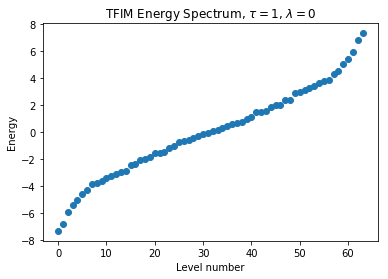

In [11]:
plt.plot(np.linalg.eigvalsh(H(1,0)), 'o')
plt.xlabel('Level number')
plt.ylabel('Energy')
plt.title('TFIM Energy Spectrum, $τ=1$, $\lambda=0$')
plt.savefig('tfim.png')

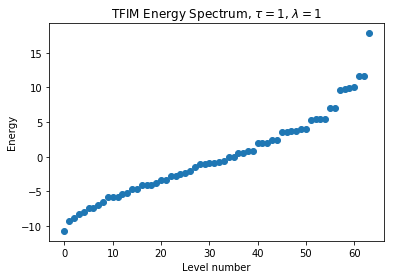

In [16]:
plt.plot(np.linalg.eigvalsh(H(1,2)), 'o')
plt.xlabel('Level number')
plt.ylabel('Energy')
plt.title('TFIM Energy Spectrum, $τ=1$, $\lambda=1$')
plt.savefig('tfim.png')